<a href="https://colab.research.google.com/github/Mahmood81s/Supervised-learning-visualization/blob/main/Copy_of_supervised_learning_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Uploading dataset from kaggle

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"mahmoodsardari","key":"485b41ec3c6ba6bf1094f8f5af7b03a6"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              234KB  2021-07-16 07:08:29           9279  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5677  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2062  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2414  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
! kaggle datasets download -d uciml/pima-indians-diabetes-database

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 11.9MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  pima-indians-diabetes-database.zip
replace diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (2).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))

# data exploration

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = df.drop('Outcome', axis='columns')
y = df['Outcome']

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
y = np.where(y > 0, 1, 0)

# scaling data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# PCA for reducing dimention to two and visualization

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
x_pca = PCA(2).fit_transform(X_std)
y_pred = KMeans(n_clusters = 2, random_state = 123).fit_predict(X_std)

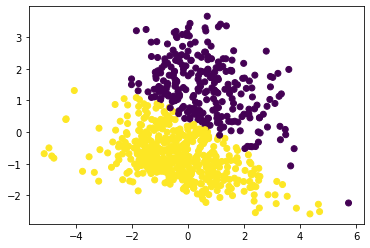

In [ ]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=y_pred)
plt.show()


In [ ]:
print('comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

comparing k-means clusters against the data:
col_0    0    1
row_0          
0      127  147
1      373  121


the model is doing good. it is correctly classifying 520 cases out of 768. 

# SSE

In [ ]:
k_rng = range(1,10)
sse = []
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(X_std)
  sse.append(km.inertia_)

In [ ]:
sse

[6144.0,
 5128.924225224271,
 4359.8589287851755,
 3918.952267495887,
 3625.743466542053,
 3361.1548729764368,
 3139.4693371699723,
 3000.342049491778,
 2876.020811239304]

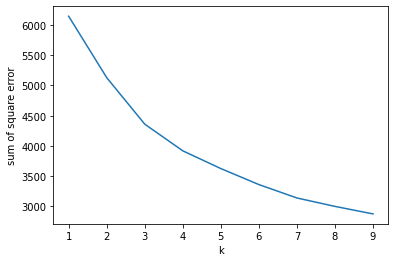

In [ ]:
plt.xlabel('k')
plt.ylabel('sum of square error')
plt.plot(k_rng,sse)

# ARI for 2, 3, 4 clusters with K-means comparison

In [ ]:
from sklearn import metrics
pred_2 = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
pred_3 = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
pred_4 = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)

print("ARI for two cluster k-means: {}".format(
    metrics.adjusted_rand_score(y, pred_2)))
print("ARI for three cluster k-means: {}".format(
    metrics.adjusted_rand_score(y, pred_3)))
print("ARI for four cluster k-means: {}".format(
    metrics.adjusted_rand_score(y, pred_4)))

ARI for two cluster k-means: 0.11786908019810102
ARI for three cluster k-means: 0.12242241571916766
ARI for four cluster k-means: 0.16012517593694922


4 clusters is better because ARI score in higher than other two. 

# Silhouette score for 2, 3, 4 clusters with K-means comparison

In [ ]:
pred_2 = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
pred_3 = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
pred_4 = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)

print("Silhouette score for two cluster k-means: {}".format(
    metrics.silhouette_score(X_std, pred_2, metric='euclidean')))
print("Silhouette score for three cluster k-means: {}".format(
    metrics.silhouette_score(X_std, pred_3, metric='euclidean')))
print("Silhouette score for four cluster k-means: {}".format(
    metrics.silhouette_score(X_std, pred_4, metric='euclidean')))

Silhouette score for two cluster k-means: 0.19519912459596034
Silhouette score for three cluster k-means: 0.1784643674529339
Silhouette score for four cluster k-means: 0.20174890536020607


again 4 clusters because the silhouette score is the highest. 

# Hierarchy: Dendogram with different method and agglomerative 
* ARI & Shilhouette comparison

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

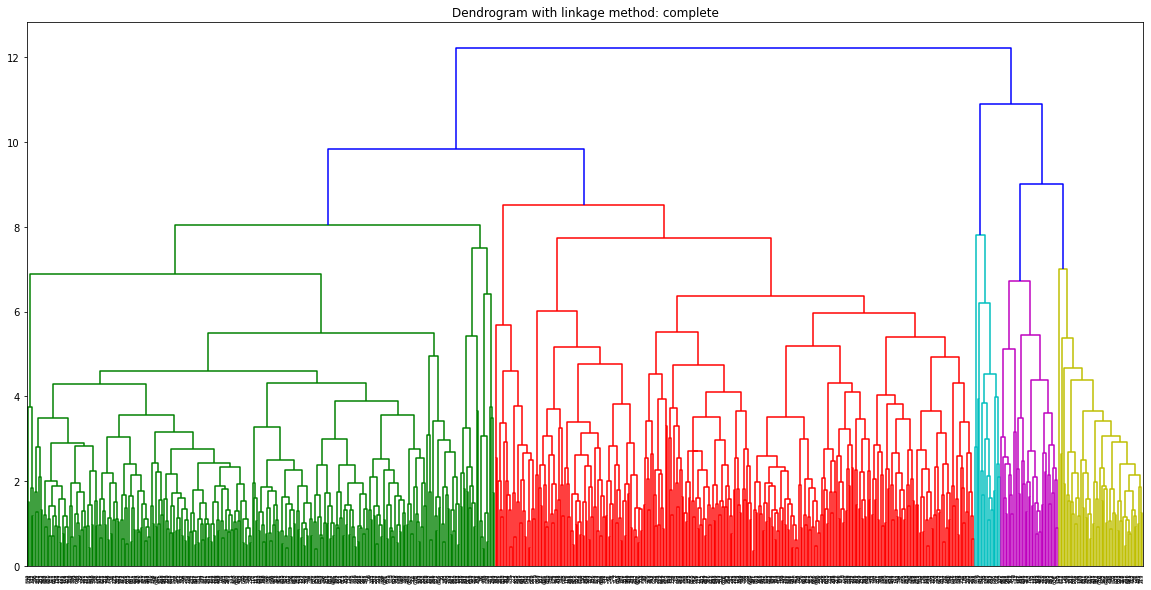

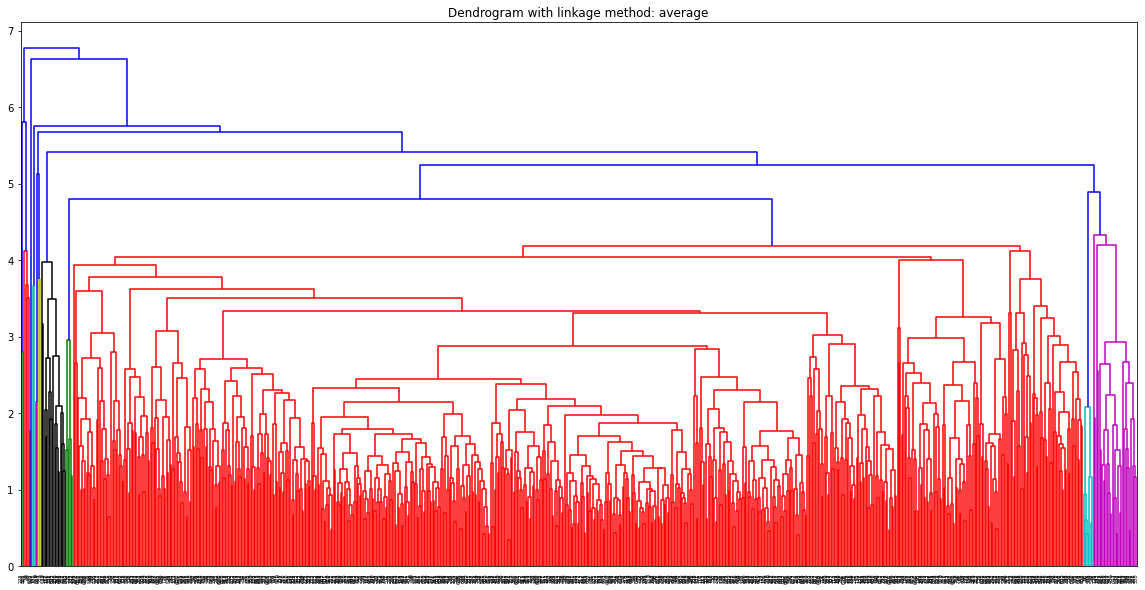

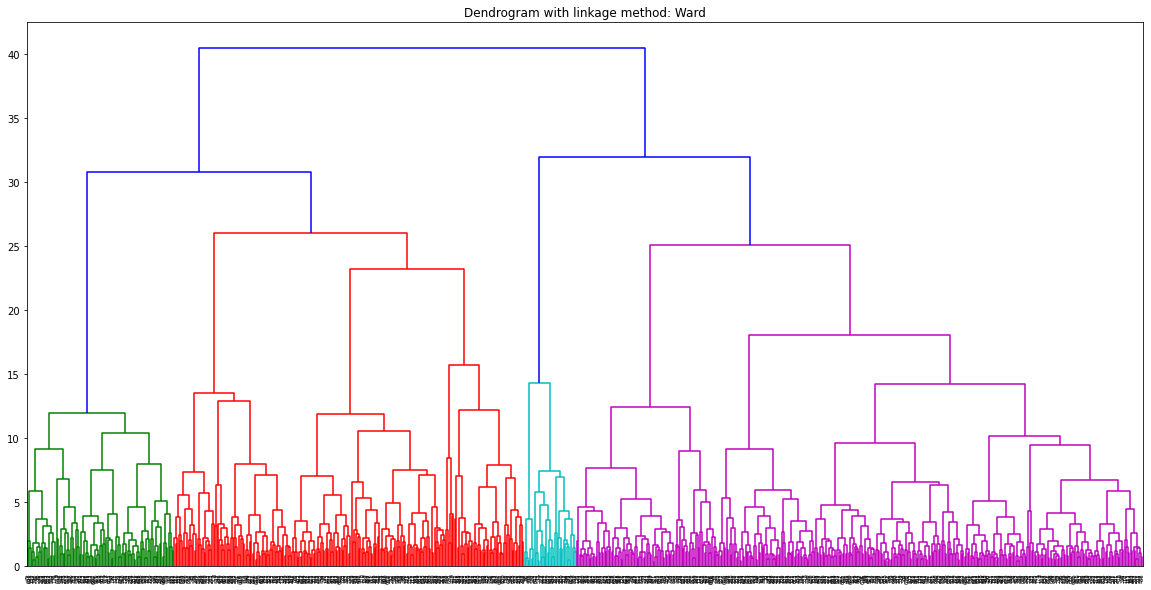

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: complete")
dendrogram(linkage(X_std, method='complete'))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: average")
dendrogram(linkage(X_std, method='average'))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: Ward")
dendrogram(linkage(X_std, method='ward'))
plt.show()


In [ ]:
linkage_methods = ["ward", "average", "complete"]

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="average", 
                                      affinity='cosine',
                                      n_clusters=4)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("ARI score of linkage method average: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method average: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------")

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="complete", 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("ARI score of linkage method complete: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method complete: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------")
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="ward", 
                                      affinity='euclidean',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("ARI score of linkage method ward: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method ward: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))

ARI score of linkage method average: 0.059279437706085486
Silhouette score of linkage method average: 0.12016546818580172
------------------------------------------------
ARI score of linkage method complete: 0.07353008357342566
Silhouette score of linkage method complete: 0.13295472895457483
------------------------------------------------
ARI score of linkage method ward: 0.10224418306057363
Silhouette score of linkage method ward: 0.15675483450688257


the ARI score and Silhouette score with k-means for 4 clusters was .16 and .20 
 and the ARI score and Silhouette score with linkage method are lower. so in our case k-means method works out better. 

# DBSCAN 

In [ ]:
from sklearn.cluster import DBSCAN

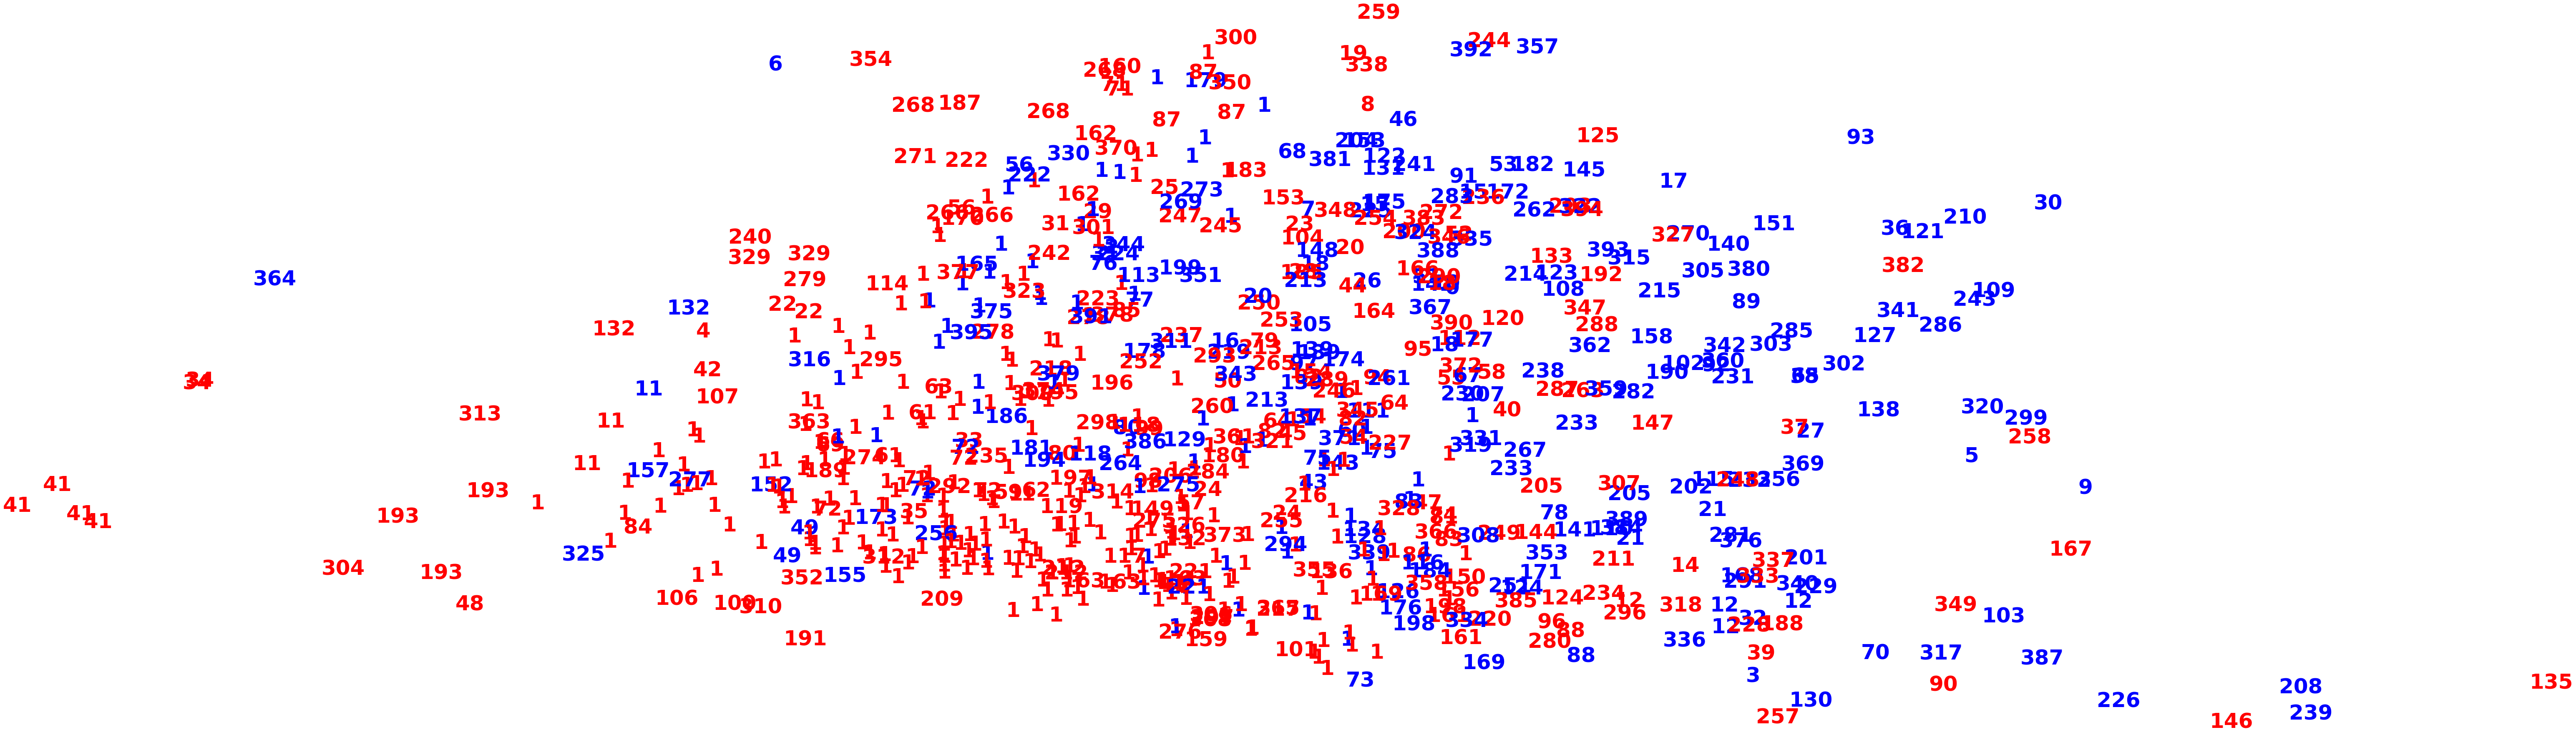

In [ ]:
dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbgrg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

print("Number of clusters when min_samples=1 is: {}".format(len(np.unique(clusters))))

min_samples_list = range(2,51)

for i in range(2,51):
    dbscan_cluster = DBSCAN(eps=1, min_samples=i, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    print("Number of clusters when min_samples={} is: {}".format(i, len(np.unique(clusters))))

Number of clusters when min_samples=1 is: 396
Number of clusters when min_samples=2 is: 48
Number of clusters when min_samples=3 is: 14
Number of clusters when min_samples=4 is: 9
Number of clusters when min_samples=5 is: 5
Number of clusters when min_samples=6 is: 4
Number of clusters when min_samples=7 is: 4
Number of clusters when min_samples=8 is: 3
Number of clusters when min_samples=9 is: 3
Number of clusters when min_samples=10 is: 3
Number of clusters when min_samples=11 is: 3
Number of clusters when min_samples=12 is: 3
Number of clusters when min_samples=13 is: 3
Number of clusters when min_samples=14 is: 2
Number of clusters when min_samples=15 is: 2
Number of clusters when min_samples=16 is: 2
Number of clusters when min_samples=17 is: 2
Number of clusters when min_samples=18 is: 2
Number of clusters when min_samples=19 is: 2
Number of clusters when min_samples=20 is: 2
Number of clusters when min_samples=21 is: 2
Number of clusters when min_samples=22 is: 2
Number of clust

In [ ]:
dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

print("Number of clusters when eps=1 is: {}".format(len(np.unique(clusters))))

min_samples_list = range(2,51)

for i in [0.01,0.1,1,2,3,4,5,6,7,8,9,10]:
    dbscan_cluster = DBSCAN(eps=i, min_samples=1, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    print("Number of clusters when eps={} is: {}".format(i, len(np.unique(clusters))))

Number of clusters when eps=1 is: 396
Number of clusters when eps=0.01 is: 768
Number of clusters when eps=0.1 is: 768
Number of clusters when eps=1 is: 396
Number of clusters when eps=2 is: 31
Number of clusters when eps=3 is: 8
Number of clusters when eps=4 is: 1
Number of clusters when eps=5 is: 1
Number of clusters when eps=6 is: 1
Number of clusters when eps=7 is: 1
Number of clusters when eps=8 is: 1
Number of clusters when eps=9 is: 1
Number of clusters when eps=10 is: 1


In [ ]:
from sklearn.mixture import GaussianMixture
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=4, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))

ARI score: 0.04050133275657918
Silhouette score: 0.0873454261700841


much lower than ARI and silhouette with k-means

In [ ]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=4, random_state=123, covariance_type="full")

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score with covariance_type=full: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score with covariance_type=full: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------------")

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=4, random_state=123, covariance_type="tied")

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score with covariance_type=tied: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score with covariance_type=tied: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------------")

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=4, random_state=123, covariance_type="diag")

# Fit model
clusters = gmm_cluster.fit_predict(X_std)
print("ARI score with covariance_type=diag: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score with covariance_type=diag: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------------")


# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=4, random_state=123, covariance_type="spherical")

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score with covariance_type=spherical: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score with covariance_type=spherical: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------------")

ARI score with covariance_type=full: 0.04050133275657918
Silhouette score with covariance_type=full: 0.0873454261700841
------------------------------------------------------
ARI score with covariance_type=tied: 0.03924617517128773
Silhouette score with covariance_type=tied: 0.1445863112780437
------------------------------------------------------
ARI score with covariance_type=diag: 0.043208008299656965
Silhouette score with covariance_type=diag: 0.06328449423446236
------------------------------------------------------
ARI score with covariance_type=spherical: 0.1336199607506052
Silhouette score with covariance_type=spherical: 0.18781964060347156
------------------------------------------------------


Silhouette score with covariance_type spherical is higher than others. and ARI score with covariance_type tied is higher than other ARI scores. 

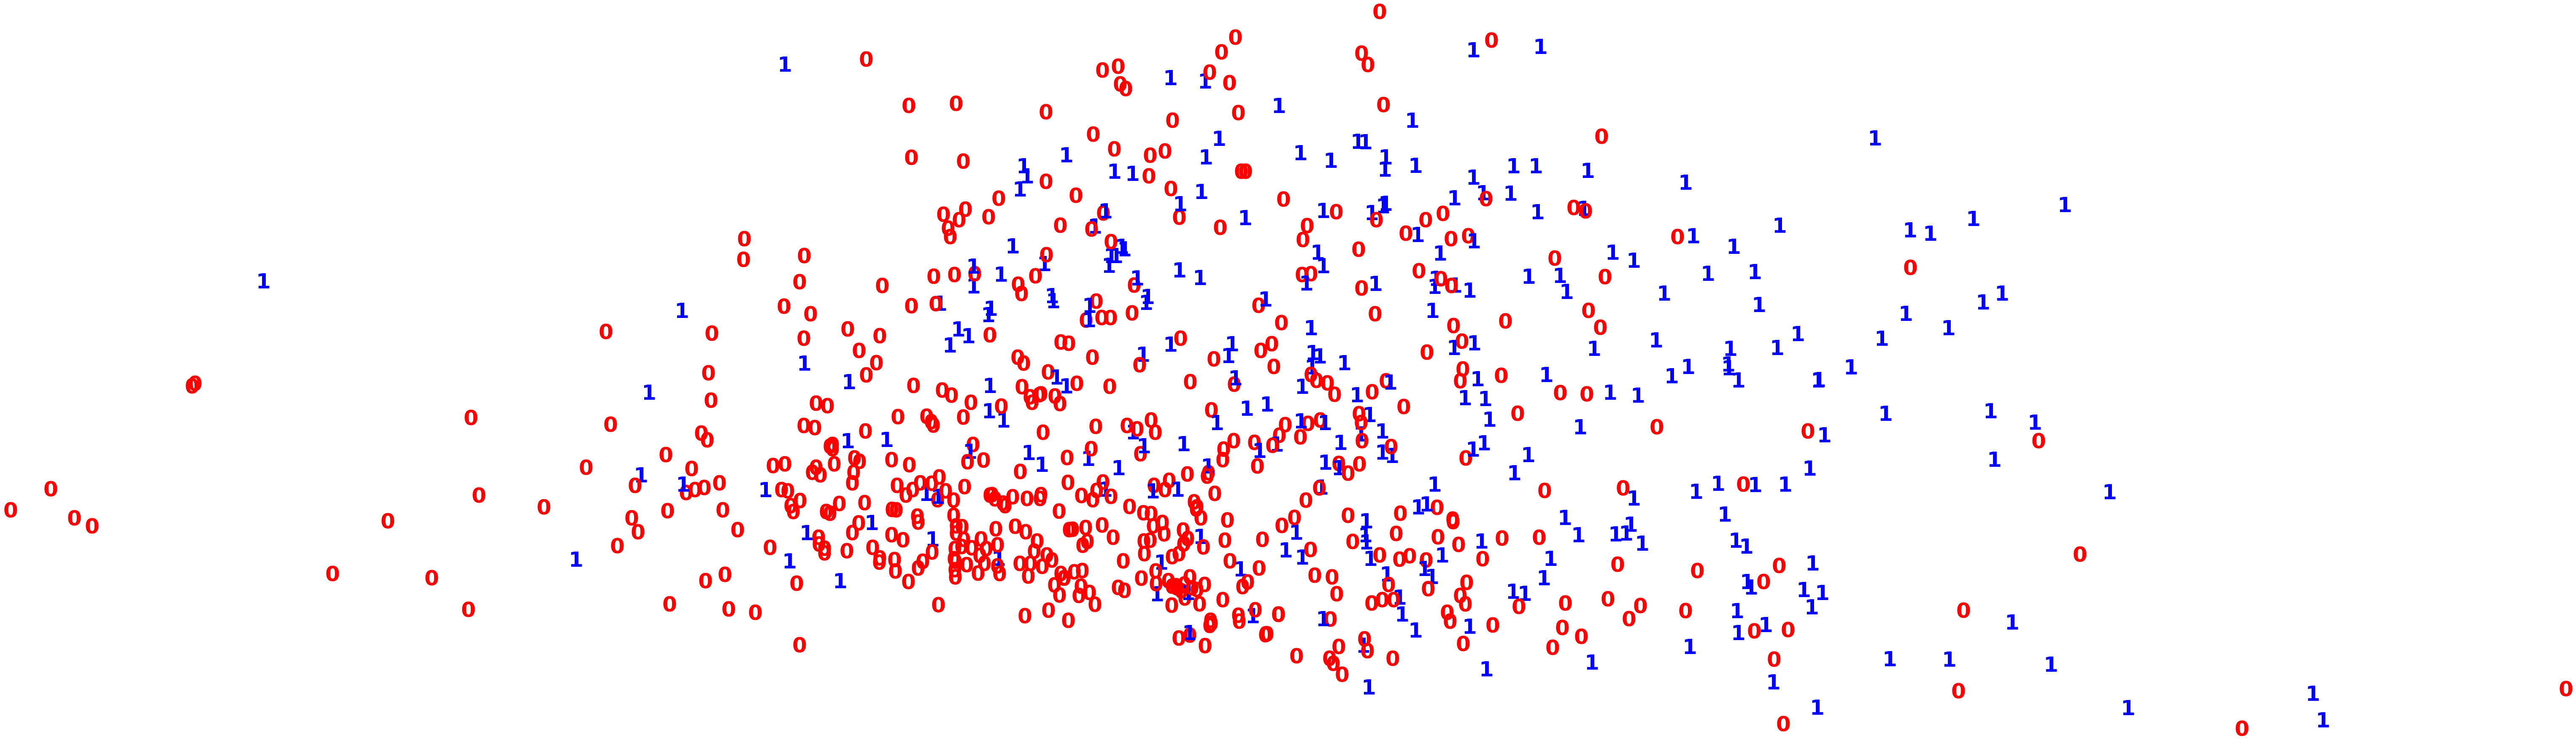

In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(x_pca.shape[0]):
    plt.text(x_pca[i, 0], x_pca[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

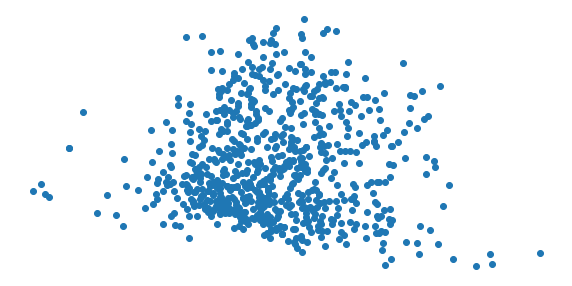

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(x_pca[:, 0], x_pca[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_std)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 768 samples in 0.001s...
[t-SNE] Computed neighbors for 768 samples in 0.032s...
[t-SNE] Computed conditional probabilities for sample 768 / 768
[t-SNE] Mean sigma: 0.894449
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.745201
[t-SNE] KL divergence after 300 iterations: 1.071621


In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

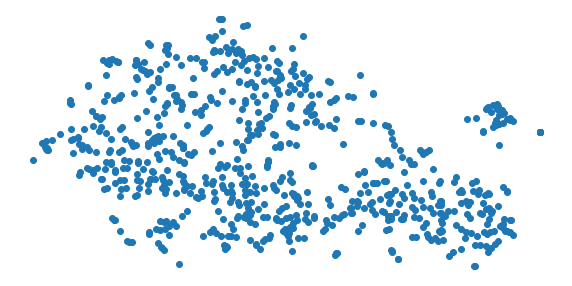

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 768 samples in 0.001s...
[t-SNE] Computed neighbors for 768 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 768 / 768
[t-SNE] Mean sigma: 0.628054
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.612968
[t-SNE] KL divergence after 300 iterations: 1.408963


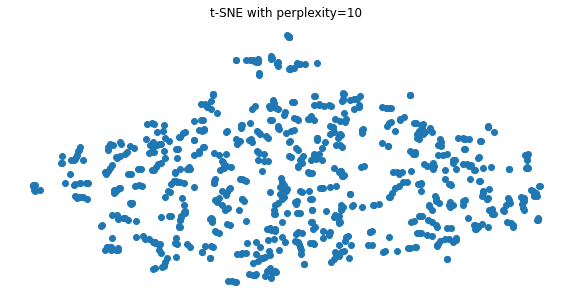

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=300)
tsne_results = tsne.fit_transform(X_std)

plt.figure(figsize=(10,5))
plt.title("t-SNE with perplexity=10")
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 768 samples in 0.001s...
[t-SNE] Computed neighbors for 768 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 768 / 768
[t-SNE] Mean sigma: 0.753414
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.496704
[t-SNE] KL divergence after 300 iterations: 1.206291


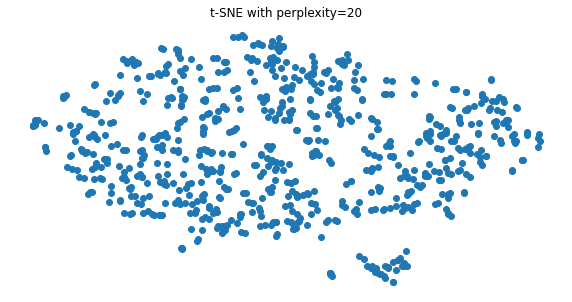

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=300)
tsne_results = tsne.fit_transform(X_std)

plt.figure(figsize=(10,5))
plt.title("t-SNE with perplexity=20")
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 768 samples in 0.001s...
[t-SNE] Computed neighbors for 768 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 768 / 768
[t-SNE] Mean sigma: 9.680892
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.942883
[t-SNE] KL divergence after 300 iterations: 0.659361


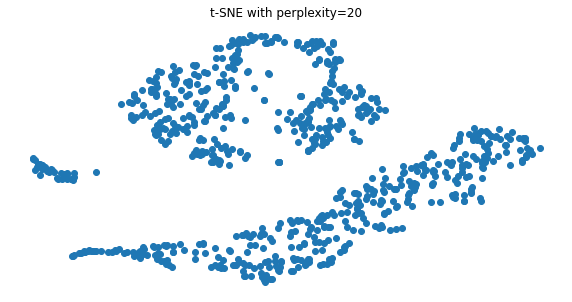

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(X)

plt.figure(figsize=(10,5))
plt.title("t-SNE with perplexity=20")
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 768 samples in 0.001s...
[t-SNE] Computed neighbors for 768 samples in 0.030s...
[t-SNE] Computed conditional probabilities for sample 768 / 768
[t-SNE] Mean sigma: 10.386957
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.674980
[t-SNE] KL divergence after 300 iterations: 0.528447


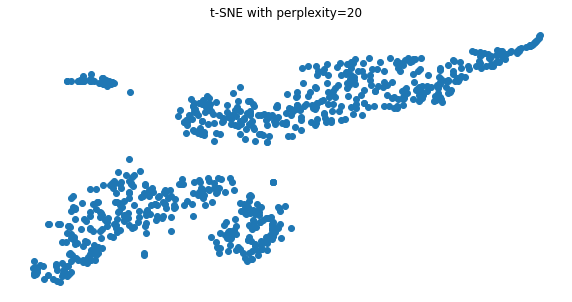

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300)
tsne_results = tsne.fit_transform(X)

plt.figure(figsize=(10,5))
plt.title("t-SNE with perplexity=20")
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 768 samples in 0.001s...
[t-SNE] Computed neighbors for 768 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 768 / 768
[t-SNE] Mean sigma: 10.618230
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.244354
[t-SNE] KL divergence after 300 iterations: 0.459446


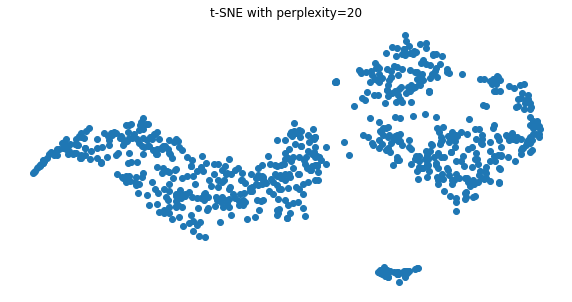

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=60, n_iter=300)
tsne_results = tsne.fit_transform(X)

plt.figure(figsize=(10,5))
plt.title("t-SNE with perplexity=20")
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
!pip install 'umap-learn==0.3.10'

In [ ]:
#pip uninstall umap
#pip install umap-learn

In [ ]:
import umap.umap_ as umap

In [ ]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_std)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


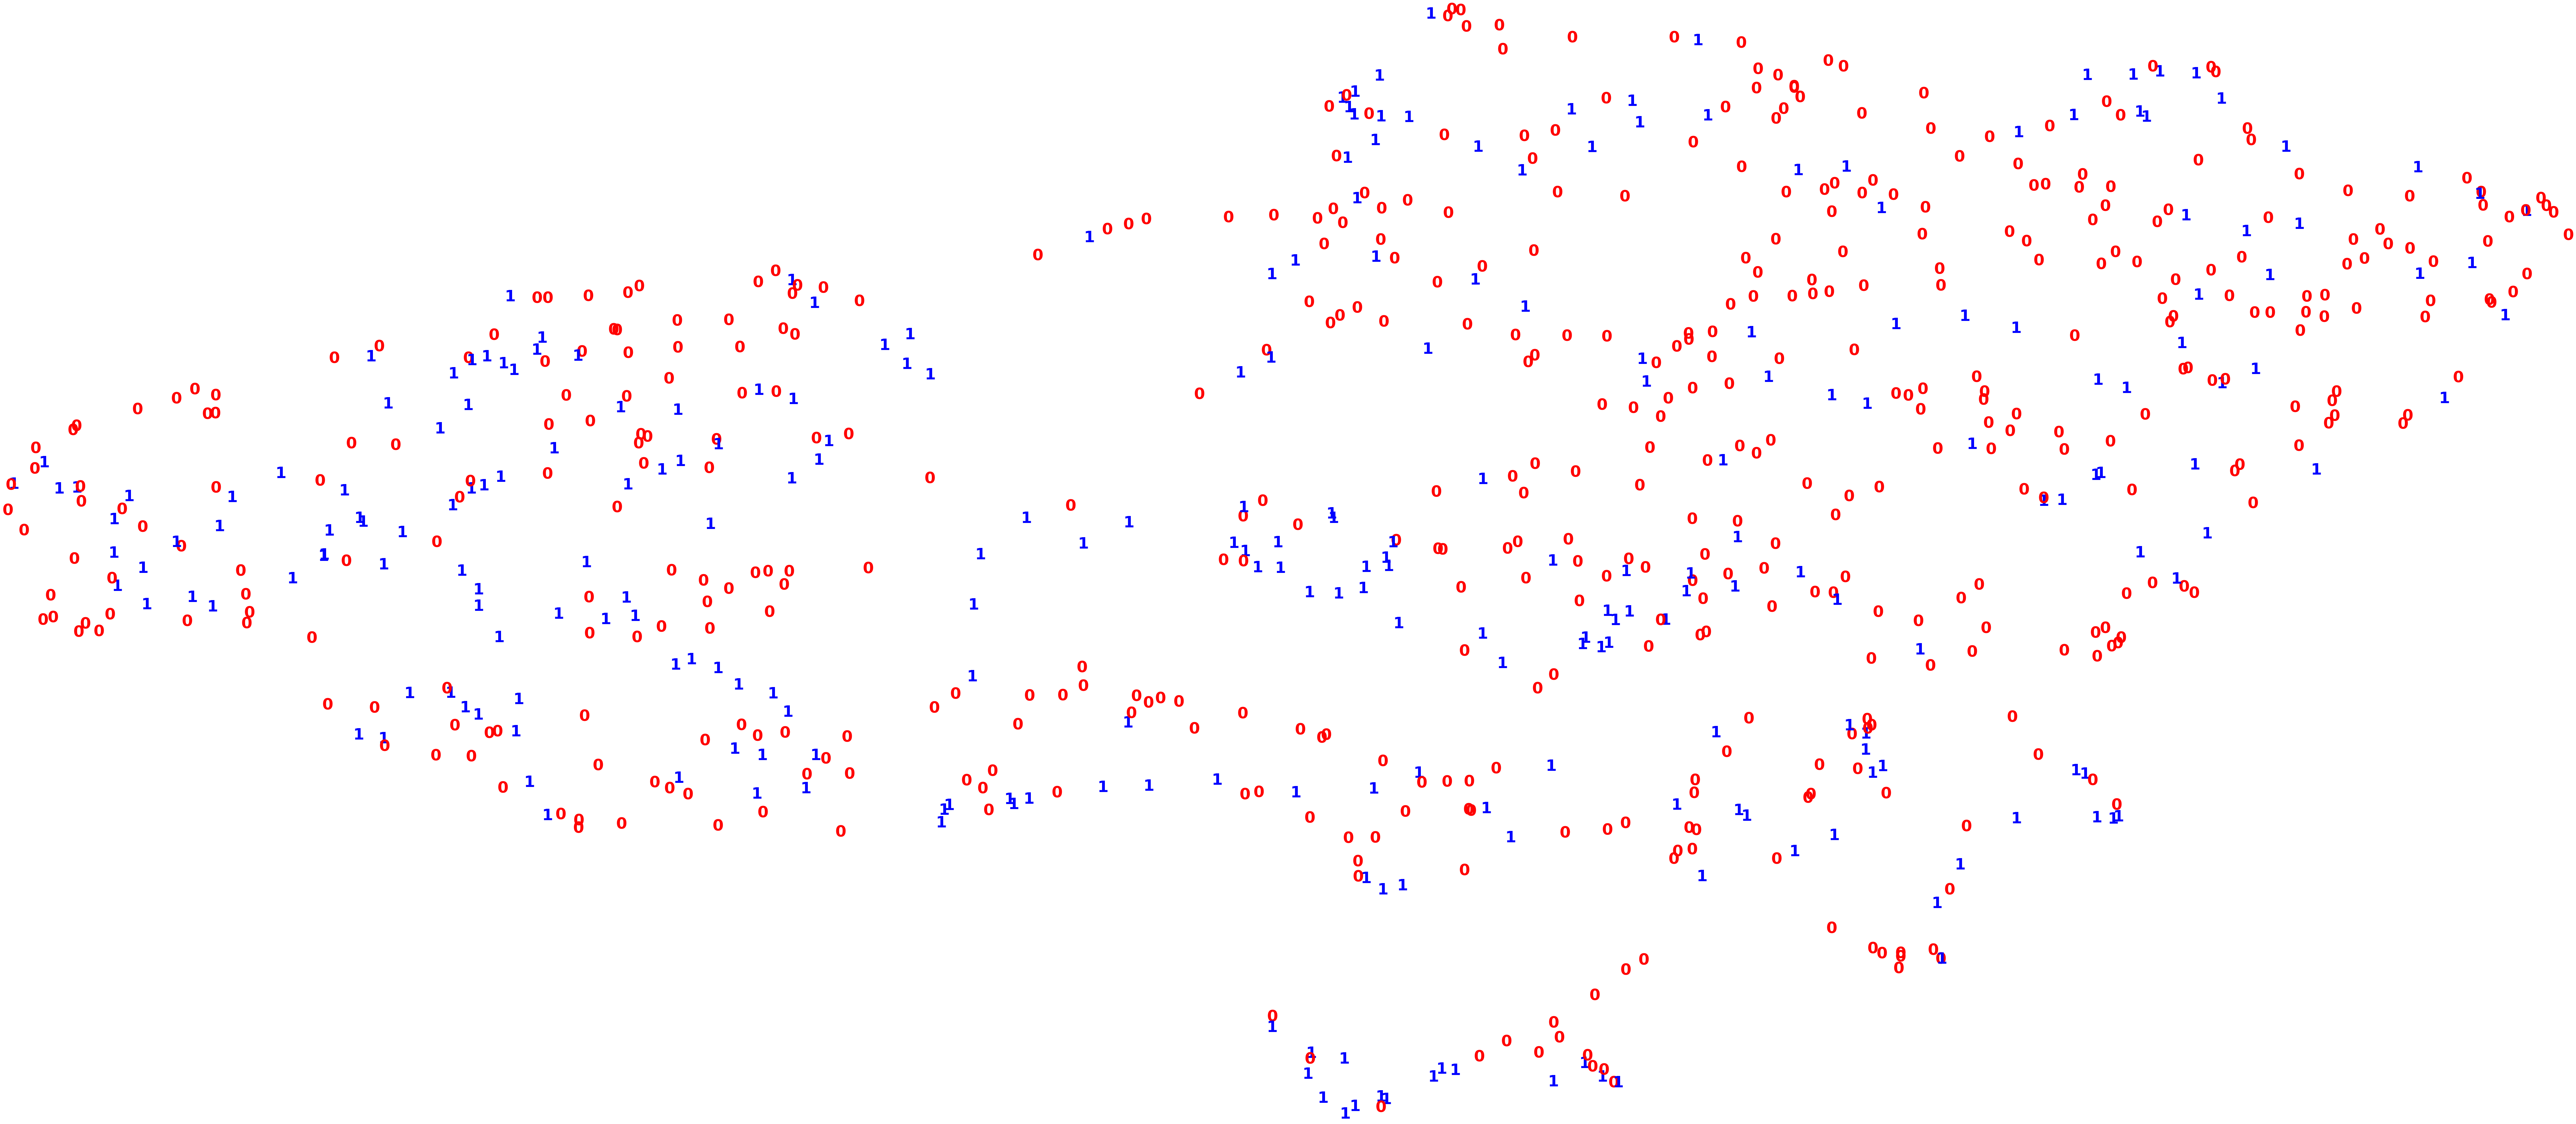

In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], y[i],
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

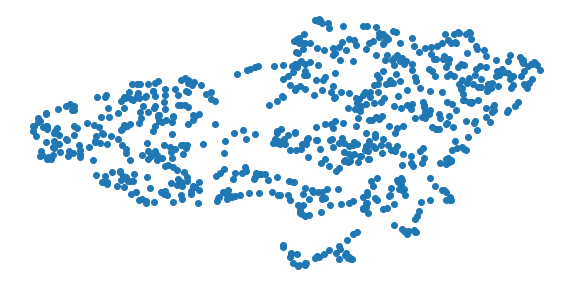

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

/usr/local/lib/python3.7/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


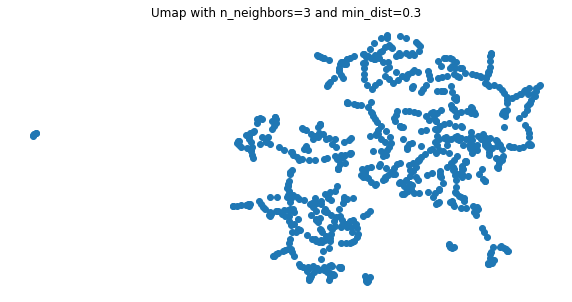

In [ ]:
umap_results = umap.UMAP(n_neighbors=3,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_std)

plt.figure(figsize=(10,5))
plt.title("Umap with n_neighbors=3 and min_dist=0.3")
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

/usr/local/lib/python3.7/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


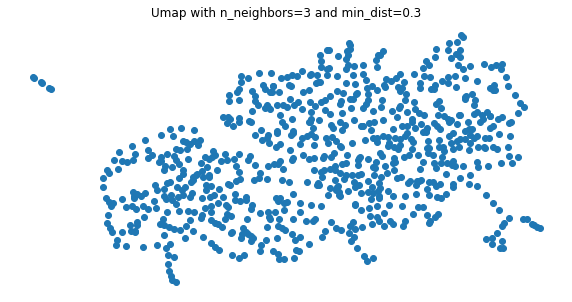

In [ ]:
umap_results = umap.UMAP(n_neighbors=3,
                      min_dist=1,
                      metric='correlation').fit_transform(X_std)

plt.figure(figsize=(10,5))
plt.title("Umap with n_neighbors=3 and min_dist=0.3")
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

/usr/local/lib/python3.7/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


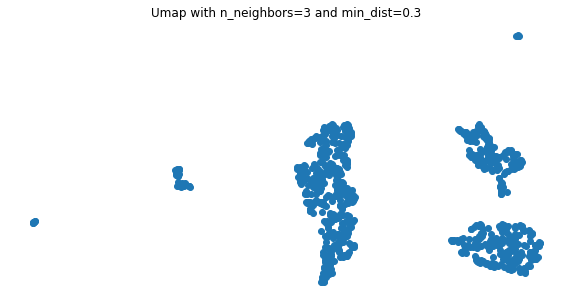

In [ ]:
umap_results = umap.UMAP(n_neighbors=7,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(10,5))
plt.title("Umap with n_neighbors=3 and min_dist=0.3")
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

/usr/local/lib/python3.7/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


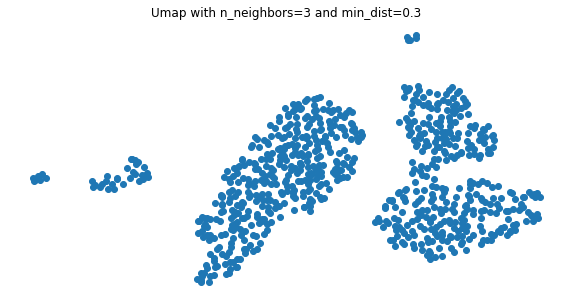

In [ ]:
umap_results = umap.UMAP(n_neighbors=7,
                      min_dist=1,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(10,5))
plt.title("Umap with n_neighbors=3 and min_dist=0.3")
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()